In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.svm import LinearSVC, SVC
from sklearn import datasets

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer


In [2]:
snowski = pd.read_csv('../data/Clean/snow_ski2.csv')
snowski.head()

,created_utc,author,score,upvote_ratio,num_comments,subreddit,text,lem_text,stem_text,post_length,post_word_count
0,1.686844e+09,bas1cred,26,0.91,19,snowboardingnoobs,my first board. ready for the upcoming season!!,my first board ready for the upcoming season,my first board readi for the upcom season,48,8
1,1.686786e+09,Pooffios,3,1.00,12,snowboardingnoobs,"outer side foot pain hi all, i was hoping to g...",outer side foot pain hi all i wa hoping to get...,outer side foot pain hi all i wa hope to get s...,301,60
2,1.686781e+09,trips69420,2,0.75,15,snowboardingnoobs,first board? looking to probably grab this as ...,first board looking to probably grab this a my...,first board look to probabl grab thi as my fir...,274,53
3,1.686779e+09,twinbee,11,0.87,0,snowboardingnoobs,i did a front-side 180 today! more than one in...,i did a front side 180 today more than one in ...,i did a front side 180 today more than one in ...,1565,289
4,1.686767e+09,Madden_Stephen,2,0.67,24,snowboardingnoobs,step-on boot recommendation? i’ve done a decen...,step on boot recommendation i ve done a decent...,step on boot recommend i ve done a decent bit ...,686,122


In [3]:
snowski.subreddit.value_counts(normalize=True)

skiing               0.51242
snowboardingnoobs    0.48758
Name: subreddit, dtype: float64

In [4]:
snowski['subreddit'] = snowski['subreddit'].map({'snowboardingnoobs': 1, 'skiing': 0})
snowski.head()

,created_utc,author,score,upvote_ratio,num_comments,subreddit,text,lem_text,stem_text,post_length,post_word_count
0,1.686844e+09,bas1cred,26,0.91,19,1,my first board. ready for the upcoming season!!,my first board ready for the upcoming season,my first board readi for the upcom season,48,8
1,1.686786e+09,Pooffios,3,1.00,12,1,"outer side foot pain hi all, i was hoping to g...",outer side foot pain hi all i wa hoping to get...,outer side foot pain hi all i wa hope to get s...,301,60
2,1.686781e+09,trips69420,2,0.75,15,1,first board? looking to probably grab this as ...,first board looking to probably grab this a my...,first board look to probabl grab thi as my fir...,274,53
3,1.686779e+09,twinbee,11,0.87,0,1,i did a front-side 180 today! more than one in...,i did a front side 180 today more than one in ...,i did a front side 180 today more than one in ...,1565,289
4,1.686767e+09,Madden_Stephen,2,0.67,24,1,step-on boot recommendation? i’ve done a decen...,step on boot recommendation i ve done a decent...,step on boot recommend i ve done a decent bit ...,686,122


In [5]:
# Function for Lemmatizing
def lemmatize_txt(text):
    
    tokenizer = RegexpTokenizer('\w+')
    split_txt = tokenizer.tokenize(text)

    # Instantiate lemmatizer
    lemmatizer = WordNetLemmatizer()
        
    # Lemmatize and Rejoin
    return ' '.join([lemmatizer.lemmatize(word) for word in split_txt])

In [6]:
# Function for Stemming
def stem_txt(text):
    
    tokenizer = RegexpTokenizer('\w+')
    split_txt = tokenizer.tokenize(text)

    # Instantiate Stemmer
    p_stemmer = PorterStemmer()

    # Stem and Rejoin
    return ' '.join([p_stemmer.stem(word) for word in split_txt])

In [7]:
X = snowski['text']
y = snowski['subreddit']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1527) 

In [9]:
# Build Models via Pipelines

In [10]:
pipe_log = Pipeline([
                 ('vec', None),
                 ('logr', LogisticRegression(solver = 'liblinear', max_iter=1000))])

In [68]:
#print('Train:', gs_log.score(X_train, y_train))
#print('Test:', gs_log.score(X_test, y_test))
#print('Best Params: ', gs_log.best_params_)

#Train: 0.9581263307310149
#Test: 0.8786373314407381
#Best Params:  {'logr__C': 3.6035714285714278, 'logr__penalty': 'l2', 'vec': TfidfVectorizer(max_df=0.9, max_features=5000, min_df=3), 'vec__max_df': 0.9, 'vec__max_features': 5000, 'vec__min_df': 3, 'vec__stop_words': None}

Train: 0.9581263307310149
Test: 0.8786373314407381
Best Params:  {'logr__C': 3.6035714285714278, 'logr__penalty': 'l2', 'vec': TfidfVectorizer(max_df=0.9, max_features=5000, min_df=3), 'vec__max_df': 0.9, 'vec__max_features': 5000, 'vec__min_df': 3, 'vec__stop_words': None}


In [11]:
pgrid_logr =[
    {
    'vec': [CountVectorizer()],
    'vec__stop_words': [None, 'english'],
    'vec__max_features': [7000, 9000], 
    #'vec__min_df': [3, 5],
    #'vec__max_df': [0.9, 0.95],
    #'vec__preprocessor': [None, lemmatize_txt, stem_txt],
    'logr__C': np.linspace(.05,5.0,10),
    'logr__penalty': ['l1', 'l2']
    },
    {
    'vec': [TfidfVectorizer()],
    'vec__stop_words': [None, 'english'],
    'vec__max_features': [7000, 9000], 
    #'vec__min_df': [3, 5],
    #'vec__max_df': [0.9, 0.95],
    #'vec__preprocessor': [None, lemmatize_txt,stem_txt],
    'logr__C': np.linspace(.05,10.0,15),
    'logr__penalty': ['l1', 'l2']
    }
]

In [13]:
%%time
import warnings
warnings.filterwarnings('default') # source: https://stackoverflow.com/questions/40105796/turn-warning-off-in-a-cell-jupyter-notebook

gs_log = GridSearchCV(pipe_log, pgrid_logr, cv=5)
gs_log.fit(X_train, y_train)

C:\Users\farah\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\farah\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\farah\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\farah\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\farah\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\farah\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

CPU times: total: 1min 50s
Wall time: 9min 9s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vec', None),
                                       ('logr',
                                        LogisticRegression(max_iter=1000,
                                                           solver='liblinear'))]),
             param_grid=[{'logr__C': array([0.05, 0.6 , 1.15, 1.7 , 2.25, 2.8 , 3.35, 3.9 , 4.45, 5.  ]),
                          'logr__penalty': ['l1', 'l2'],
                          'vec': [CountVectorizer()],
                          'vec__max_features': [7000, 9000],
                          'vec__stop_words': [None, 'english']},
                         {'logr__C': array([ 0.05      ,  0.76071429,  1.47142857,  2.18214286,  2.89285714,
        3.60357143,  4.31428571,  5.025     ,  5.73571429,  6.44642857,
        7.15714286,  7.86785714,  8.57857143,  9.28928571, 10.        ]),
                          'logr__penalty': ['l1', 'l2'],
                          'vec': [TfidfVectorizer(max_features=7000,
                                                  stop_words='english')],
                          'vec__max_features': [7000, 9000],
                          'vec__stop_words': [None, 'english']}])

In [14]:
print('Train:', gs_log.score(X_train, y_train))
print('Test:', gs_log.score(X_test, y_test))
print('Best Params: ', gs_log.best_params_)

Train: 0.9550508634965696
Test: 0.879347054648687
Best Params:  {'logr__C': 2.182142857142857, 'logr__penalty': 'l2', 'vec': TfidfVectorizer(max_features=7000, stop_words='english'), 'vec__max_features': 7000, 'vec__stop_words': 'english'}


In [39]:
# Make predictions
preds_log = gs_log.predict(X_test)

In [40]:
# Classification report
print(classification_report(y_test, preds_log))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       692
           1       0.92      0.84      0.88       717

    accuracy                           0.88      1409
   macro avg       0.88      0.88      0.88      1409
weighted avg       0.88      0.88      0.88      1409



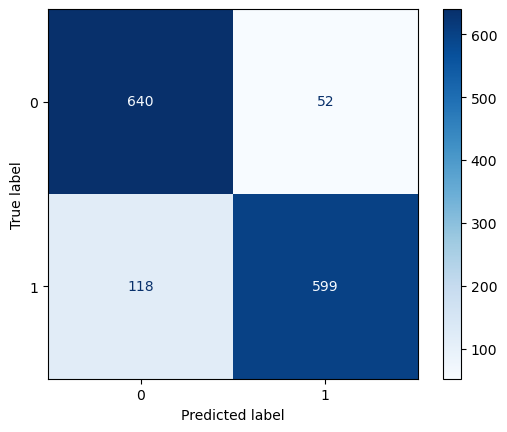

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, preds_log, cmap = 'Blues');

In [20]:
pipe_nb = Pipeline([
    ('vec', None),
    ('nb', MultinomialNB())
])

In [21]:
pgrid_nb =[
    {
    'vec': [CountVectorizer()],
    'vec__stop_words': [None, 'english'],
    'vec__max_features': [7000, 9000], 
    #'vec__min_df': [3, 5],
    'vec__max_df': [0.9, 0.95],
    #'vec__preprocessor': [None, lemmatize_txt, stem_txt],
    'nb__alpha': [.01, 0.5, 1.0, 5.0]
    },
    {
    'vec': [TfidfVectorizer()],
    'vec__stop_words': [None, 'english'],
    'vec__max_features': [7000, 9000], 
    #'vec__min_df': [3, 5],
    'vec__max_df': [0.9, 0.95],
    #'vec__preprocessor': [None, lemmatize_txt,stem_txt],
    'nb__alpha': [.01, 0.5, 1.0, 5.0]
    }
]

In [22]:
%%time
#import warnings
warnings.filterwarnings('default') # source: https://stackoverflow.com/questions/40105796/turn-warning-off-in-a-cell-jupyter-notebook

gs_nb = GridSearchCV(pipe_nb, pgrid_nb, cv=5)
gs_nb.fit(X_train, y_train)

CPU times: total: 7.47 s
Wall time: 34.4 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vec', None), ('nb', MultinomialNB())]),
             param_grid=[{'nb__alpha': [0.01, 0.5, 1.0, 5.0],
                          'vec': [CountVectorizer(max_df=0.9,
                                                  max_features=7000)],
                          'vec__max_df': [0.9, 0.95],
                          'vec__max_features': [7000, 9000],
                          'vec__stop_words': [None, 'english']},
                         {'nb__alpha': [0.01, 0.5, 1.0, 5.0],
                          'vec': [TfidfVectorizer()],
                          'vec__max_df': [0.9, 0.95],
                          'vec__max_features': [7000, 9000],
                          'vec__stop_words': [None, 'english']}])

In [23]:
print('Train:', gs_nb.score(X_train, y_train))
print('Test:', gs_nb.score(X_test, y_test))
print('Best Params: ', gs_nb.best_params_)

Train: 0.907735982966643
Test: 0.8559261887863733
Best Params:  {'nb__alpha': 0.5, 'vec': CountVectorizer(max_df=0.9, max_features=7000), 'vec__max_df': 0.9, 'vec__max_features': 7000, 'vec__stop_words': None}


In [42]:
preds_nb = gs_nb.predict(X_test)

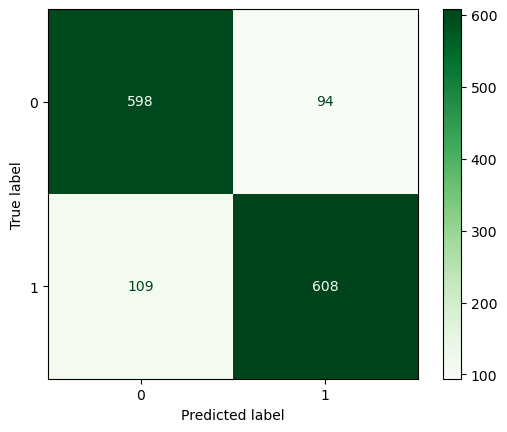

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, preds_nb, cmap = 'Greens');

In [ ]:
print(classification_report(y_test, preds_gs))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       692
           1       0.87      0.85      0.86       717

    accuracy                           0.86      1409
   macro avg       0.86      0.86      0.86      1409
weighted avg       0.86      0.86      0.86      1409



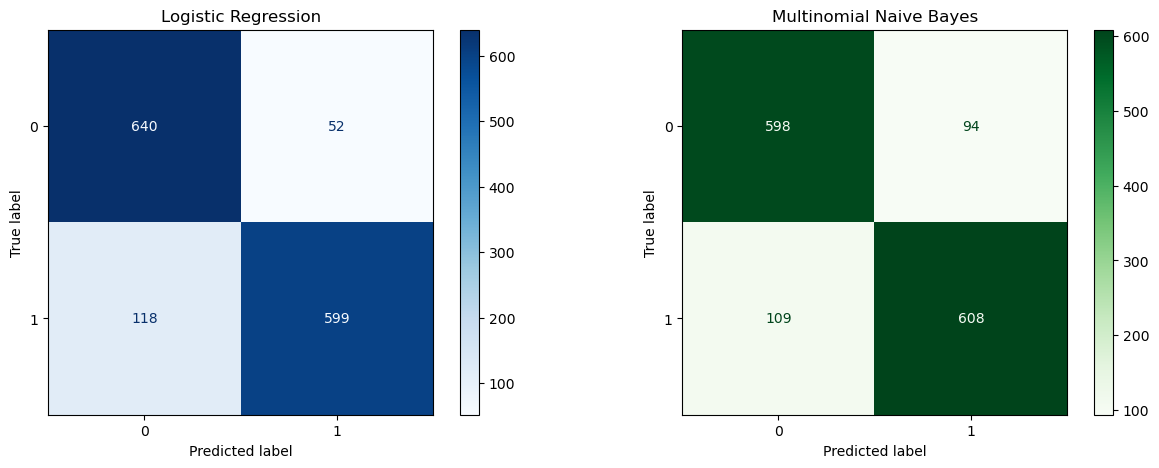

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ConfusionMatrixDisplay.from_estimator(gs_log, X_test, y_test, cmap = 'Blues', ax=ax[0]);
ConfusionMatrixDisplay.from_estimator(gs_nb, X_test, y_test, cmap = 'Greens', ax=ax[1]);

ax[0].set_title('Logistic Regression')
ax[1].set_title('Multinomial Naive Bayes');

In [ ]:
print(f'--------- Logistic --------- \n {classification_report(y_test, preds_log)} \n -------------------------------------------------------- \n')
print(f'------------ NB ------------ \n  {classification_report(y_test, preds_gs)}')

In [59]:
pipe_svc.get_params()

{'memory': None,
 'steps': [('vec', None), ('svc', SVC())],
 'verbose': False,
 'vec': None,
 'svc': SVC(),
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [62]:
pipe_svc = Pipeline([
    ('vec', None),
    ('svc', SVC())
])

In [63]:
pgrid_svc =[
    {
    'vec': [CountVectorizer()],
    'vec__stop_words': [None, 'english'],
    'vec__max_features': [7000, 9000], 
    #'vec__min_df': [3, 5],
    'vec__max_df': [0.9, 0.95],
    #'vec__preprocessor': [None, lemmatize_txt, stem_txt],
     'svc__C': np.linspace(0.8, 1.1, 20),
     'svc__kernel': ['rbf','poly', 'linear'],
     'svc__degree' : [2,3,4],
     'svc__tol' : [0.001]
    },
    {
    'vec': [TfidfVectorizer()],
    'vec__stop_words': [None, 'english'],
    'vec__max_features': [7000, 9000], 
    #'vec__min_df': [3, 5],
    'vec__max_df': [0.9, 0.95],
    #'vec__preprocessor': [None, lemmatize_txt,stem_txt],
     'svc__C': np.linspace(0.8, 1.1, 20),
     'svc__kernel': ['rbf','poly', 'linear'],
     'svc__degree' : [2,3,4],
     'svc__tol' : [0.001]
    }
]

In [ ]:
%%time

gs_svc = GridSearchCV(pipe_svc, pgrid_svc)
gs_svc.fit(X_train, y_train)

In [ ]:
print('Train:', gs_svc.score(X_train, y_train))
print('Test:', gs_svc.score(X_test, y_test))
print('Best Params: ', gs_svc.best_params_)

In [ ]:
preds_svc = gs_svc.predict(X_test)

In [ ]:
print(f'--------- Logistic --------- \n {classification_report(y_test, preds_log)} \n -------------------------------------------------------- \n')
print(f'----------- SVC ------------ \n  {classification_report(y_test, preds_svc)}')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ConfusionMatrixDisplay.from_estimator(gs_log, X_test, y_test, cmap = 'Blues', ax=ax[0]);
ConfusionMatrixDisplay.from_estimator(gs_svc, X_test, y_test, cmap = 'Greens', ax=ax[1]);

ax[0].set_title('Logistic Regression')
ax[1].set_title('Support Vector Machine
                ');

In [ ]:
pipe_log.get_params()

In [20]:
# Look at params for TVEC
tvec_params = Pipeline([('tvec', TfidfVectorizer())])
tvec_params.get_params()

{'memory': None,
 'steps': [('tvec', TfidfVectorizer())],
 'verbose': False,
 'tvec': TfidfVectorizer(),
 'tvec__analyzer': 'word',
 'tvec__binary': False,
 'tvec__decode_error': 'strict',
 'tvec__dtype': numpy.float64,
 'tvec__encoding': 'utf-8',
 'tvec__input': 'content',
 'tvec__lowercase': True,
 'tvec__max_df': 1.0,
 'tvec__max_features': None,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__norm': 'l2',
 'tvec__preprocessor': None,
 'tvec__smooth_idf': True,
 'tvec__stop_words': None,
 'tvec__strip_accents': None,
 'tvec__sublinear_tf': False,
 'tvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tvec__tokenizer': None,
 'tvec__use_idf': True,
 'tvec__vocabulary': None}

In [ ]:
# Look at params for CVEC
cvec_params = Pipeline([('cvec', CountVectorizer())])
cvec_params.get_params()